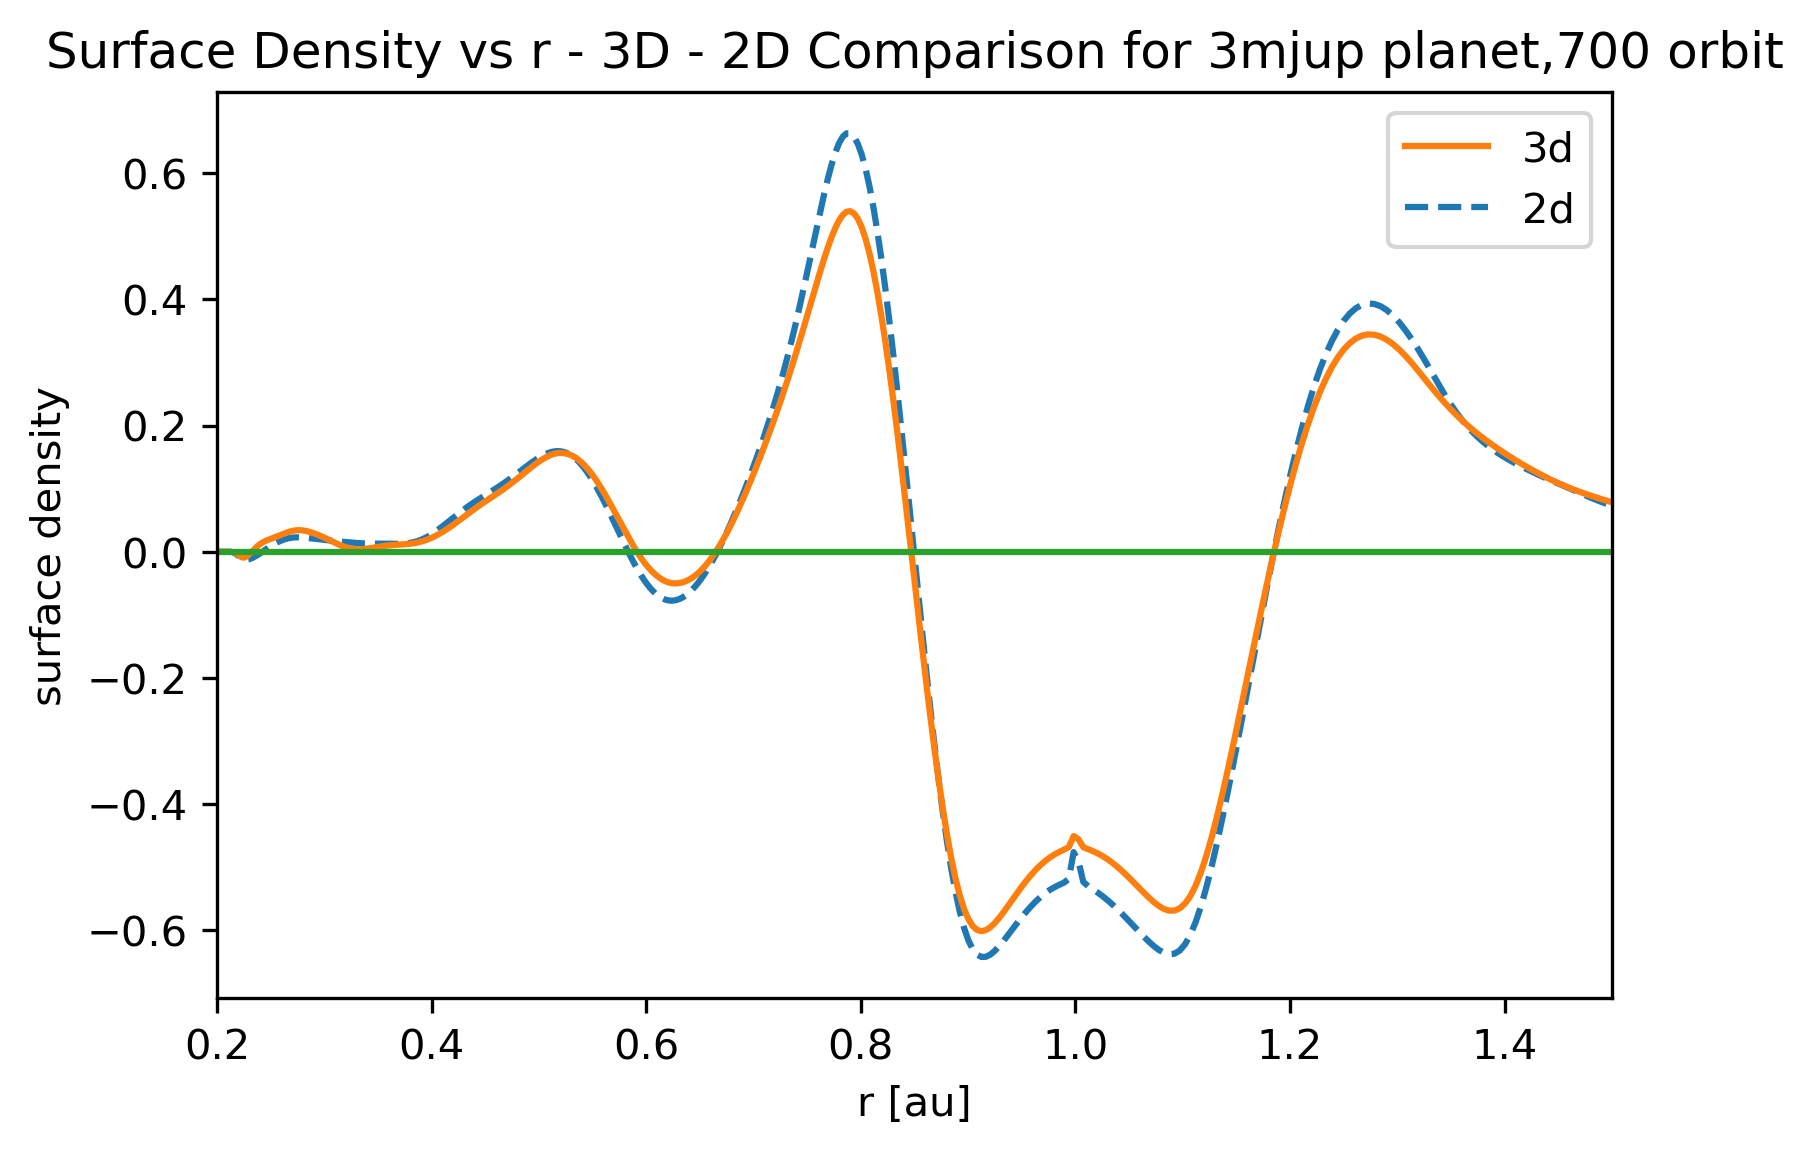

In [26]:
import readfargo3d as fg
import matplotlib.pyplot as plt


dir1 = './bae2017_03jup1400x512/'
dir2 = './p3disof_test'
#dir2 = './bae2017_03jup700x256/'

itime = 70
r0 = 1.0
fargo1    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=True,dir=dir2) 
#fargo3    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir3) 
#fargo4    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4) 
fargo1i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=dir2) 
#fargo3i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir3) 
#fargo4i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4)

fig, ax = plt.subplots(dpi = 300)
l1jup, = ax.plot(fargo1.r,(fargo1.rho.mean(axis=0)-fargo1i.rho.mean(axis=0))/fargo1i.rho.mean(axis=0), label='2d',linestyle='dashed')
#l3jup, = ax.plot(fargo2.r,((fargo2.rho.mean(axis=0)[:,int(66/2)]-fargo2i.rho.mean(axis=0)[:,int(66/2)])/fargo2i.rho.mean(axis=0)[:,int(66/2)]), label='3d')
l3jup, = ax.plot(fargo2.r,((fargo2.rho.mean(axis=0).sum(axis=1)-fargo2i.rho.mean(axis=0).sum(axis=1))/fargo2i.rho.mean(axis=0).sum(axis=1)), label='3d')
ax.plot([0,2],[0,0])
ax.legend(handles=[l3jup,l1jup])#,l03jup,l04jup])
ax.set_xlim(0.2,1.5)
#ax.set_ylim(-3,9)
ax.set_xlabel('r [au]')
ax.set_ylabel('surface density')
ax.set_title('Surface Density vs r - 3D - 2D Comparison for 3mjup planet,'+str(itime*10)+' orbit')
plt.savefig('3D_density_r'+str(itime*10)+'.png',dpi=300)

In [25]:
print((fargo2.rho.mean(axis=0)).sum(axis=1).shape)

(512,)


In [27]:
#print(fargo2.rho.mean(axis=0)[:,34])

700


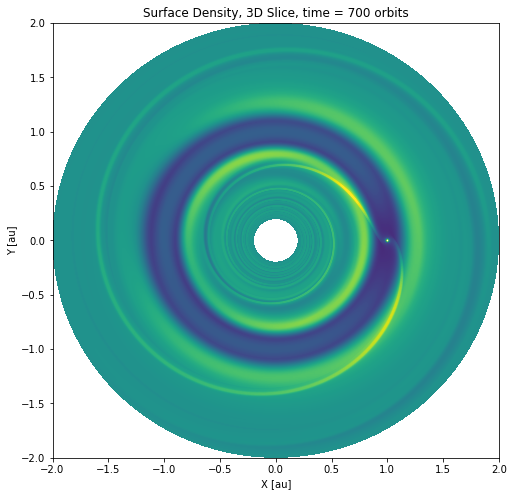

In [31]:
#imaging
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pylab as pl

path = './p3disof_test/'
#path = './p3disof_0planet/'

fargo2    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=True,dir=path) 
fargo2i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=path) 


nslice = 0
nf=70
phi = np.loadtxt(path +'domain_x.dat')
rad  = np.loadtxt(path +'domain_y.dat')[3:-3]
z = np.loadtxt(path +'domain_z.dat')

phi   = 0.5*(phi[:-1] + phi[1:]) #what does this mean?                                                                                                                          
rad   = 0.5*(rad[:-1] + rad[1:])
#z   = 0.5*(z[:-1] + z[1:])


rad2d, phi2d = np.meshgrid(rad, phi) #explain meshgrid?                                                                                                                         

X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)
Z = z

nx = len(phi)
ny = len(rad)
nz = 66




print(nf*10)

vmin = -1.
vmax = 1.
levels = np.linspace(vmin,vmax,256)

fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(X, Y,((fargo2.rho.sum(axis=2)-fargo2i.rho.sum(axis=2))/fargo2i.rho.sum(axis=2)), levels=levels)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('X [au]')
ax.set_ylabel('Y [au]')
ax.set_title(f'Surface Density, 3D Sum, time = {nf*10} orbits')
#plt.close()
plt.savefig('3D_image_3mjup'+str(nf*10)+'.png',dpi=300)




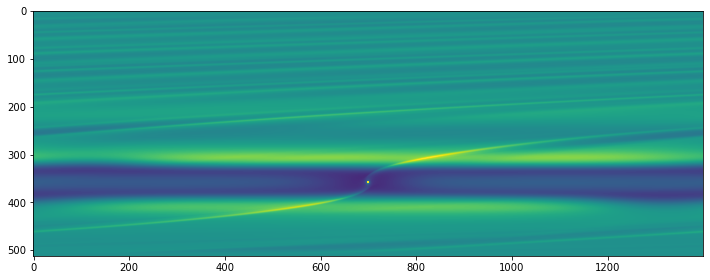

In [32]:
fig, ax = plt.subplots(figsize=(12,12))

ax.imshow((fargo2.rho.sum(axis=2)/fargo2i.rho.sum(axis=2)).T,vmin=0,vmax=2)



700


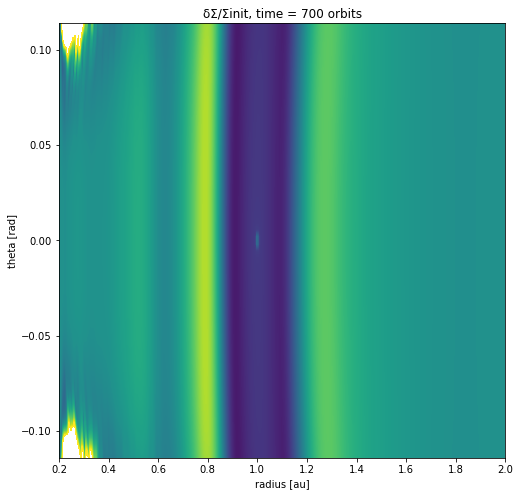

In [64]:
#imaging
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pylab as pl

path = './p3disof_test/'
#path = './p3disof_0planet/'

fargo2    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=True,dir=path) 
fargo2i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=path) 

nf = 70
phi = np.loadtxt(path +'domain_x.dat')
rad  = np.loadtxt(path +'domain_y.dat')[3:-3]
theta= np.loadtxt(path +'domain_z.dat')

phi   = 0.5*(phi[:-1] + phi[1:]) #what does this mean?                                                                                                                          
rad   = 0.5*(rad[:-1] + rad[1:])



rad2d, phi2d = np.meshgrid(rad, phi)                                                                                                                          
rad3d , phi3d, theta3d = np.meshgrid(fargo2.r,fargo2.phi,fargo2.theta)
X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)


nx = len(phi)
ny = len(rad)
nz = len(theta)




print(nf*10)

vmin = -.7
vmax = .7
levels = np.linspace(vmin,vmax,256)

fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(fargo2.r, (rad3d*np.cos(theta3d)).mean(axis=0).mean(axis=0),(((fargo2.rho.sum(axis=0)-fargo2i.rho.sum(axis=0))/fargo2i.rho.sum(axis=0))).T, levels=levels)
ax.set_xlim(.2,2)
#ax.set_ylim(1.42,1.72)
ax.set_xlabel('radius [au]')
ax.set_ylabel('theta [rad]')
ax.set_title(f'δΣ/Σinit, time = {nf*10} orbits')
#plt.close()
plt.savefig('xz3D_image_3mjup.png')

In [57]:
print((rad3d*np.cos(theta3d)).sum(axis=0).sum(axis=0).shape)

(66,)


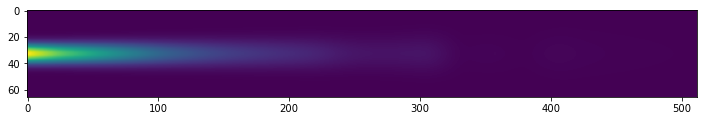

In [24]:

fig, ax = plt.subplots(figsize=(12,12))

ax.imshow(fargo2.rho.mean(axis=0).T)
